We have given a dataset which specifies the patients having heart disease or not based for various features. By using this dataset we will create a model which will learn from this dataset and will able to predict the availability of heart diseases on patients. we will use few classifiers(random forest classifier, support vector classifier, MLP classifier) and see how they will perform on this dataset.

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [21]:
# Read the csv file
data = pd.read_csv("../input/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#check the null values in data and find its counts
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
# the data contains no null value. Now we will count the target values
data['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

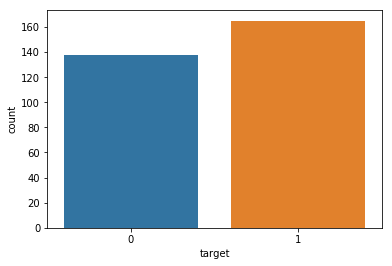

In [24]:
# Data visualization
sns.countplot(data.target)

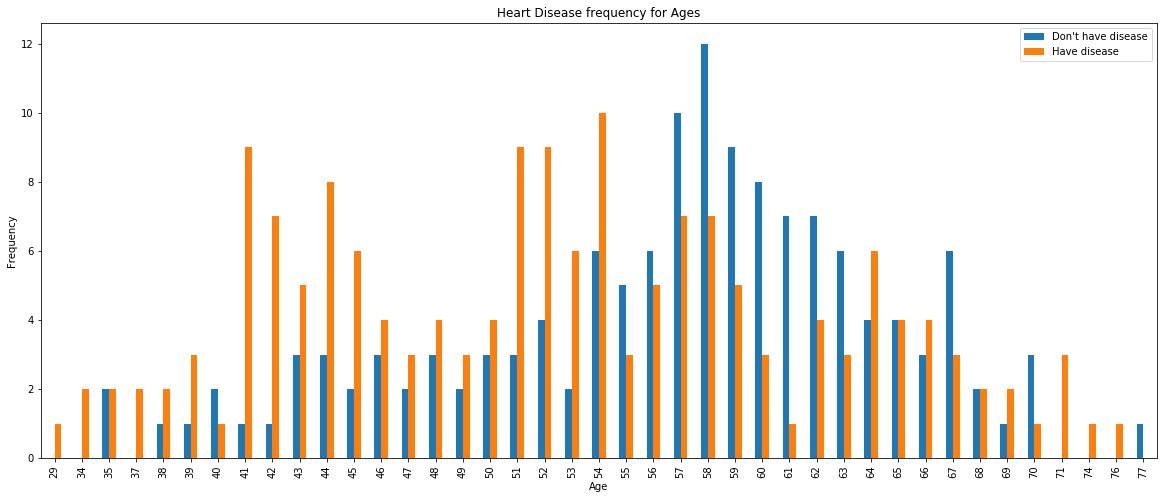

In [25]:
pd.crosstab(data['age'], data['target']).plot(kind='bar', figsize=(20, 8))
plt.title('Heart Disease frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.savefig('heartDiseaseForAge.png')
plt.show()

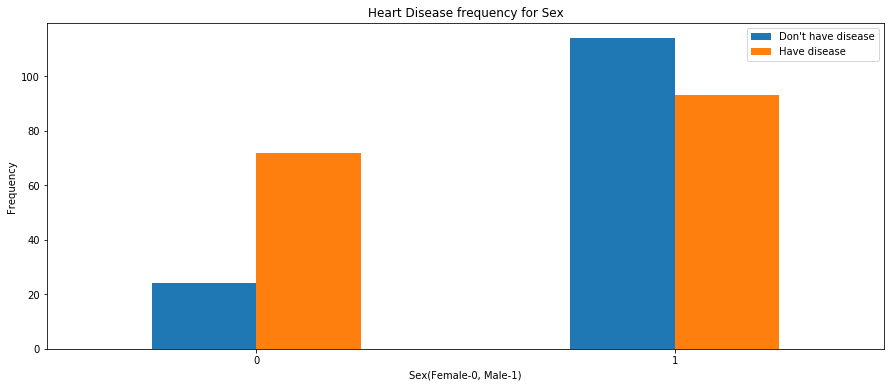

In [26]:
pd.crosstab(data['sex'], data['target']).plot(kind='bar', figsize=(15, 6))
plt.title('Heart Disease frequency for Sex')
plt.xlabel('Sex(Female-0, Male-1)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(["Don't have disease", "Have disease"])
plt.show()

In [27]:
# Now seperate the data as response variable and feature variable

X_data = data.drop('target', axis=1)
y = data['target']

# Normalisation

X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

In [28]:
# Train and Test splitting of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

In [29]:
# Applying Standard Scaling to get optimized results

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [30]:
# Random forest Classifier

rand_fc = RandomForestClassifier(n_estimators=200)
rand_fc.fit(X_train,y_train)
pred_rfc = rand_fc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print('Confusion Matrix:',confusion_matrix(y_test, pred_rfc))
print('Accuracy:',accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix: [[21  6]
 [ 4 30]]
Accuracy: 0.8360655737704918


In [31]:
# Support Vector Classifier (SVC)

classifier = SVC()
classifier.fit(X_train, y_train)
pred_classi = classifier.predict(X_test)
print(classification_report(y_test, pred_classi))
print('Confusion Matrix:',confusion_matrix(y_test, pred_classi))
print('Accuracy:',accuracy_score(y_test, pred_classi))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix: [[21  6]
 [ 2 32]]
Accuracy: 0.8688524590163934


In [32]:
# MLP Classifier
mlpc = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print('Confusion Matrix:',confusion_matrix(y_test, pred_mlpc))
print('Accuracy:',accuracy_score(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.80      0.71      0.75        34

   micro avg       0.74      0.74      0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Confusion Matrix: [[21  6]
 [10 24]]
Accuracy: 0.7377049180327869


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
